In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load the data
# Tip: The data is in the form of an edgelist
# Tip 2: The arguments data=[("weight", float),] should be used to load the weights
# Tip 3 : The argument create_using=nx.DiGraph() should be used to load the data as a directed graph
G = nx.read_edgelist("../data/24_1.txt", data = [("weight", float),], create_using = nx.DiGraph())

In [3]:
# Get the weights
# Tip: nx.get_edge_attributes to get the weights attribute
# Tip 2 This returns a dictionary, so use list(dict.values()) to get the values

edgeweights = list(dict(nx.get_edge_attributes(G, "weight")).values())

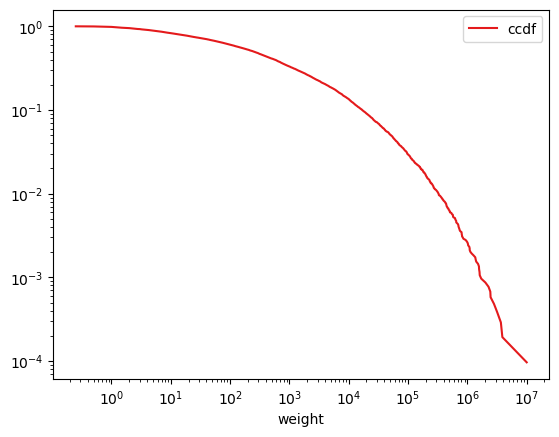

In [4]:
# Let's use our degree CCDF code for the edge weights
# Tip Same aproach as the privious CCDF exercises but now with the edge weights instead of the degrees

wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

In [5]:
# Average & stdev of the weights
# Tip: Use numpy to calculate the mean and standard deviation of the weights
edgeweights = np.array(edgeweights)
print("Edge weight average: %1.4f" % np.mean(edgeweights))
print("Edge weight stdev: %1.4f" % np.std(edgeweights))

Edge weight average: 17191.3325
Edge weight stdev: 149924.3810
